In [1]:
import pandas as pd

# Carregar o dataset
df = pd.read_csv("winequality-white.csv", sep=";")

In [2]:
# Dropar a coluna 'quality'
df = df.drop(columns=['quality'])

In [3]:
from sklearn.model_selection import train_test_split

# Dividir o dataset
train, test = train_test_split(df, test_size=0.25, random_state=42)

# Salvar os datasets
train.to_csv("trainv5.csv", index=False)
test.to_csv("testv5.csv", index=False)

In [4]:
# Printar estatísticas descritivas
print("Original Data Description:\n", df.describe())
print("\nTrain Data Description:\n", train.describe())
print("\nTest Data Description:\n", test.describe())

Original Data Description:
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000  

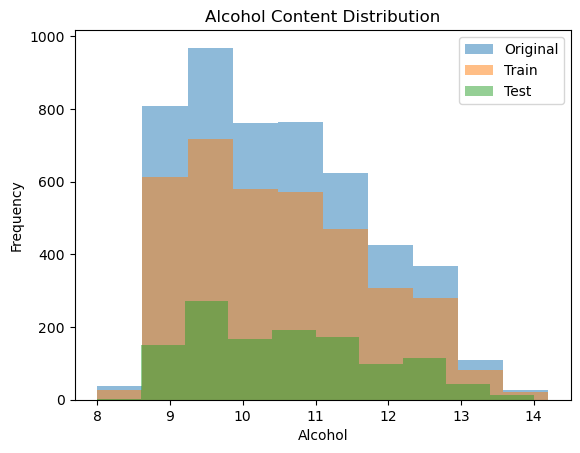

In [5]:
import matplotlib.pyplot as plt

# Plotar histograma
plt.hist(df['alcohol'], alpha=0.5, label='Original')
plt.hist(train['alcohol'], alpha=0.5, label='Train')
plt.hist(test['alcohol'], alpha=0.5, label='Test')
plt.legend(loc='upper right')
plt.title('Alcohol Content Distribution')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Normalizar os conjuntos de treino e teste
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

Mean RMSE for 5-Folds: 0.46210936188354185
Mean RMSE for 10-Folds: 0.4483656806418618


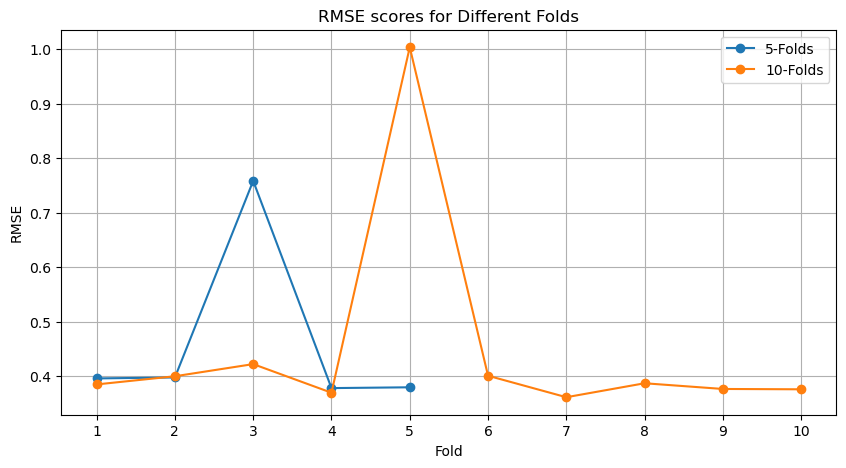

Mean R2 for 5-Folds: 0.8461933890092752
Mean R2 for 10-Folds: 0.8411416019413427


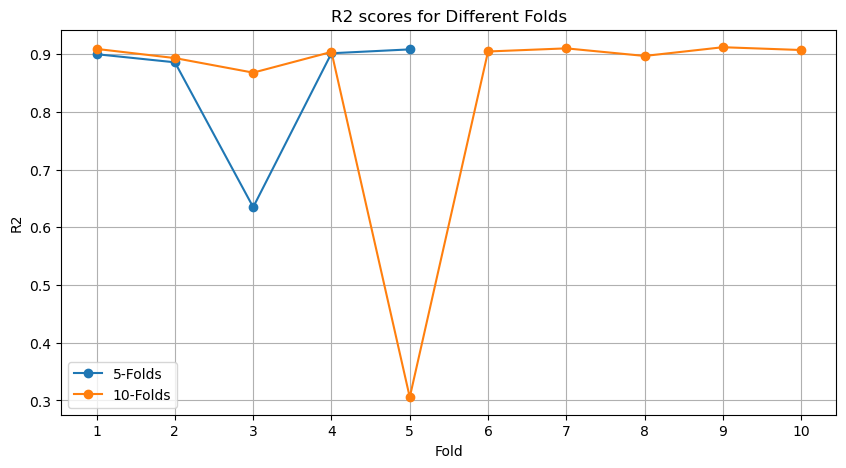

In [7]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

def cross_val_and_plot_combined(train, folds_list):
    X = train.drop(columns=['alcohol'])
    y = train['alcohol']
    model = LinearRegression()
    
    plt.figure(figsize=(10, 5))
    
    for folds in folds_list:
        kfold = KFold(n_splits=folds, shuffle=True, random_state=42)
        scores = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
        
        rmse_scores = np.sqrt(-scores)
        
        plt.plot(range(1, folds+1), rmse_scores, marker='o', label=f'{folds}-Folds')
        print(f'Mean RMSE for {folds}-Folds: {rmse_scores.mean()}')
        
    plt.title('RMSE scores for Different Folds')
    plt.xlabel('Fold')
    plt.ylabel('RMSE')
    plt.xticks(range(1, max(folds_list)+1))
    plt.legend()
    plt.grid(True)
    plt.show()

# Aplicar a função para 5 e 10 folds
cross_val_and_plot_combined(train, [5, 10])

def cross_val_and_plot_r2_combined(train, folds_list):
    X = train.drop(columns=['alcohol'])
    y = train['alcohol']
    model = LinearRegression()
    
    plt.figure(figsize=(10, 5))
    
    for folds in folds_list:
        kfold = KFold(n_splits=folds, shuffle=True, random_state=42)
        scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')
        
        plt.plot(range(1, folds+1), scores, marker='o', label=f'{folds}-Folds')
        print(f'Mean R2 for {folds}-Folds: {scores.mean()}')
        
    plt.title('R2 scores for Different Folds')
    plt.xlabel('Fold')
    plt.ylabel('R2')
    plt.xticks(range(1, max(folds_list)+1))
    plt.legend()
    plt.grid(True)
    plt.show()

# Aplicar a função para 5 e 10 folds
cross_val_and_plot_r2_combined(train, [5, 10])


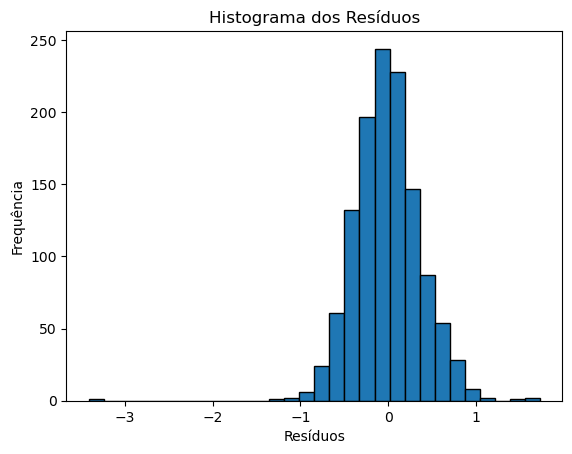

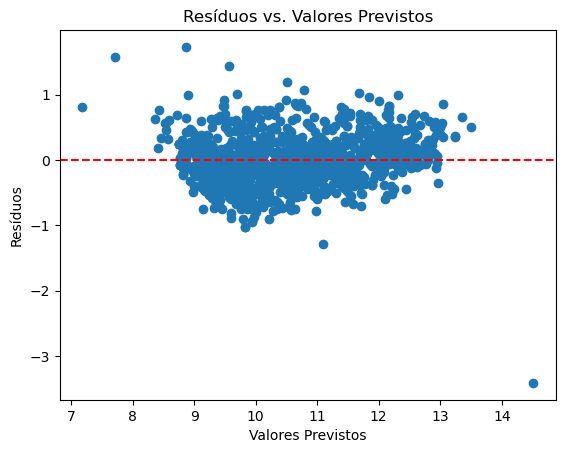

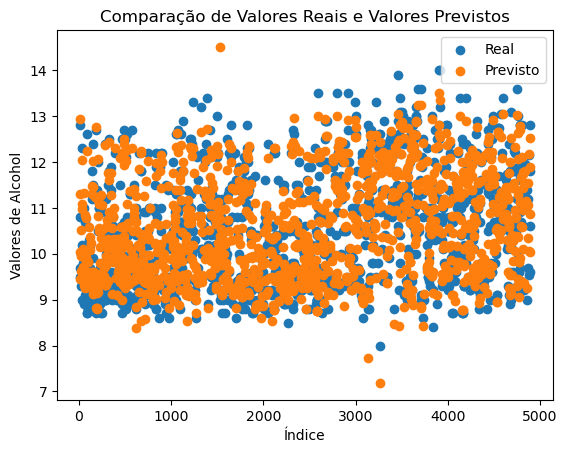

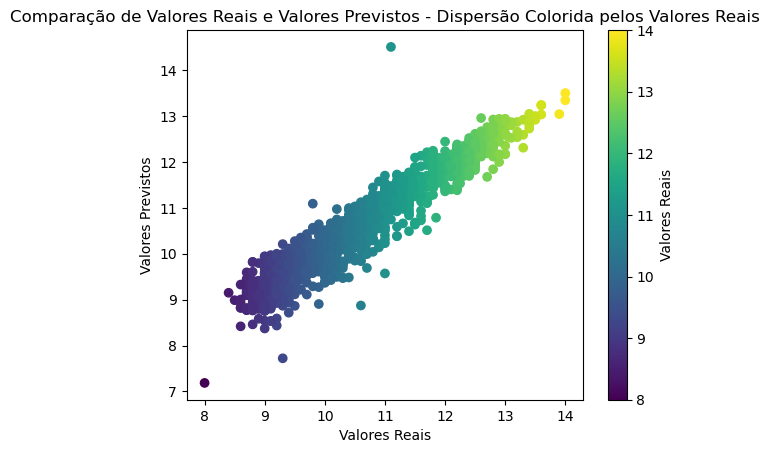

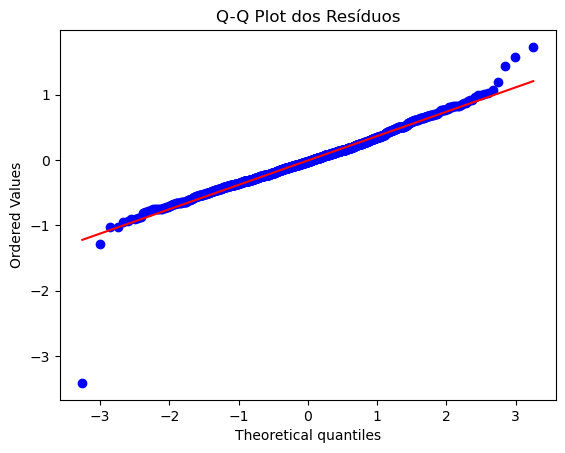

Test RMSE: 0.37861601285982305
Test R2: 0.9054313780025246


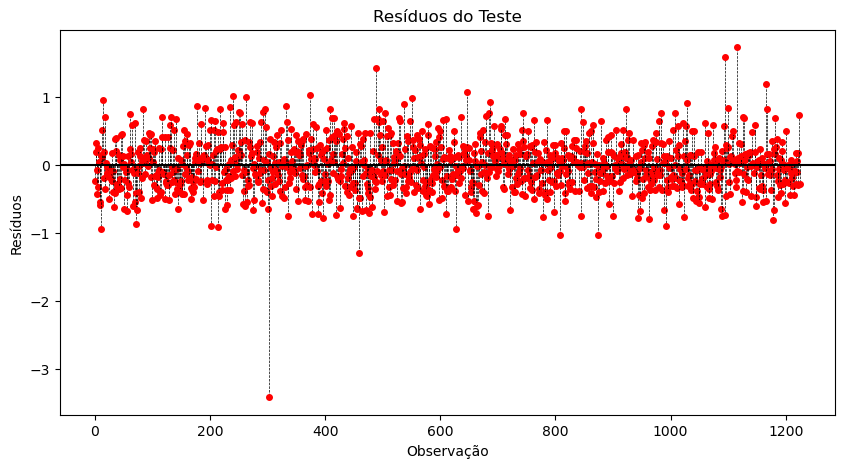

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

# Separar as variáveis ​​independentes e dependentes
X_train = train.drop(columns=['alcohol'])
y_train = train['alcohol']
X_test = test.drop(columns=['alcohol'])
y_test = test['alcohol']

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões
predictions = model.predict(X_test)

# Resíduos
residuals = y_test - predictions

# 1. Histograma dos Resíduos
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histograma dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

# 2. Resíduos vs. Valores Previstos
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Resíduos vs. Valores Previstos')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.show()

# 3. Comparação de Valores Reais e Valores Previstos
plt.scatter(y_test.index, y_test, label='Real')
plt.scatter(y_test.index, predictions, label='Previsto')
plt.legend()
plt.title('Comparação de Valores Reais e Valores Previstos')
plt.xlabel('Índice')
plt.ylabel('Valores de Alcohol')
plt.show()

# 4. Comparação com Dispersão Colorida
plt.scatter(y_test, predictions, c=y_test, cmap='viridis')
plt.colorbar().set_label('Valores Reais')
plt.title('Comparação de Valores Reais e Valores Previstos - Dispersão Colorida pelos Valores Reais')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.show()

# 5. Plot de Quantil-Quantil (Q-Q Plot) dos Resíduos
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot dos Resíduos')
plt.show()

# Calcular e imprimir métricas
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print(f'Test RMSE: {rmse}')
print(f'Test R2: {r2}')

# Criando o gráfico
fig, ax = plt.subplots(figsize=(10, 5))
# Plotando os resíduos do teste, conectando cada ponto à linha y=0
for i, residuals in enumerate(residuals):
    ax.plot([i, i], [0, residuals], color='black', linestyle='--', linewidth=0.5)
    ax.plot(i, residuals, marker='o', markersize=4, color='red')

# Adicionando uma linha horizontal y=0 para referência
ax.axhline(y=0, color='black', linestyle='-')
# Configurando labels
ax.set_xlabel('Observação')
ax.set_ylabel('Resíduos')
ax.set_title('Resíduos do Teste')
plt.show()

# Plotar os resíduos do teste no segundo subplot
ax.plot(residuals, marker='o', markersize=4, linestyle='--', color='black', markerfacecolor='red', linewidth=0.3, markeredgewidth=0)
ax.axhline(y=0, color='black', linestyle='-')
ax.set_xlabel('Observação')
ax.set_ylabel('Resíduos')
#ax.set_title('Resíduos do Teste')
plt.show()

In [19]:
def cross_val_and_plot(train, folds_list):
    X = train.drop(columns=['alcohol'])
    y = train['alcohol']
    model = LinearRegression()
    
    # Criar uma figura com dois subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    for folds in folds_list:
        # Criar um objeto KFold com o número de folds desejado
        kfold = KFold(n_splits=folds, shuffle=True, random_state=42)
        
        # Criar listas vazias para armazenar os valores de RMSE e R2
        rmse_scores = []
        r2_scores = []
        
        # Iterar sobre os folds
        for train_index, val_index in kfold.split(X):
            # Separar os dados de treino e validação
            X_train, X_val = X.iloc[train_index], X.iloc[val_index]
            y_train, y_val = y.iloc[train_index], y.iloc[val_index]
            
            # Treinar o modelo e fazer previsões
            model.fit(X_train, y_train)
            predictions = model.predict(X_val)
            
            # Calcular o RMSE e o R2 e adicionar às listas
            rmse = np.sqrt(mean_squared_error(y_val, predictions))
            r2 = r2_score(y_val, predictions)
            
            rmse_scores.append(rmse)
            r2_scores.append(r2)
        
        # Plotar os valores de RMSE e R2 nos subplots
        ax1.plot(range(1, folds+1), rmse_scores, marker='o', label=f'{folds}-Folds')
        ax2.plot(range(1, folds+1), r2_scores, marker='o', label=f'{folds}-Folds')
        
        # Imprimir a média dos valores de RMSE e R2
        print(f'Mean RMSE for {folds}-Folds: {np.mean(rmse_scores)}')
        print(f'Mean R2 for {folds}-Folds: {np.mean(r2_scores)}')
    
    # Configurar os títulos, labels, ticks e grades dos gráficos
    ax1.set_title('RMSE scores for Different Folds')
    ax1.set_xlabel('Fold')
    ax1.set_ylabel('RMSE')
    ax1.set_xticks(range(1, max(folds_list)+1))
    ax1.legend()
    #ax1.grid(True)
    
    ax2.set_title('R2 scores for Different Folds')
    ax2.set_xlabel('Fold')
    ax2.set_ylabel('R2')
    ax2.set_xticks(range(1, max(folds_list)+1))
    ax2.legend()
    #ax2.grid(True)
    
    # Mostrar a figura
    plt.show()

Mean RMSE for 5-Folds: 0.46210936188354185
Mean R2 for 5-Folds: 0.8461933890092752
Mean RMSE for 10-Folds: 0.4483656806418618
Mean R2 for 10-Folds: 0.8411416019413427


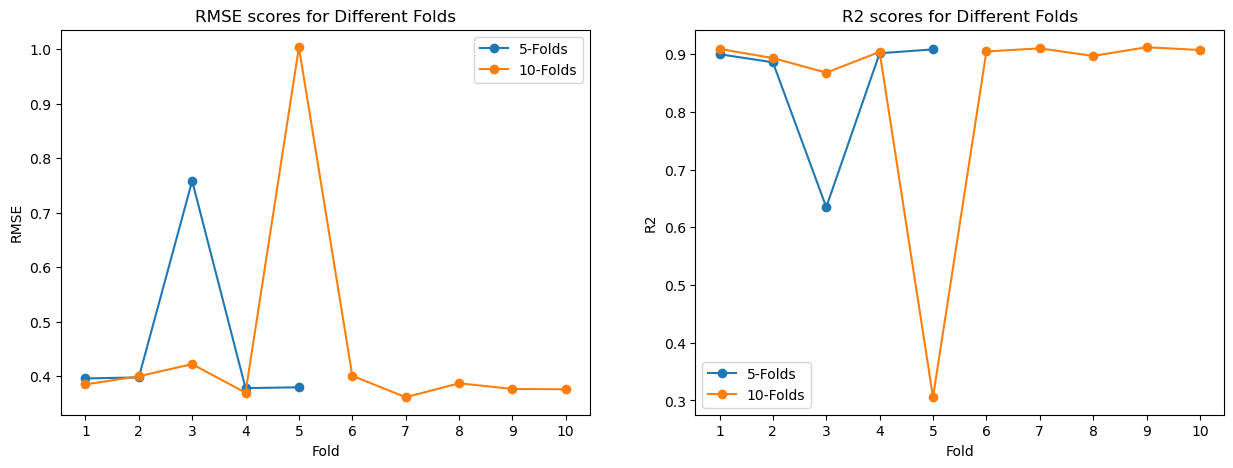

In [20]:
cross_val_and_plot(train, [5, 10])